## Natural Language Processing with Disaster Tweets

* Predict which Tweets are about real disasters and which ones are not.

* Twitter has become an important communication channel in times of emergency.

* The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of   this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

* But, it’s not always clear whether a person’s words are actually announcing a disaster.

In [1]:
import pandas as pd
import seaborn as sns
from IPython.core.display import display, HTML

### Importing Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [3]:
def download_preds(preds_test, file_name = 'sub.csv'):

     df = pd.DataFrame()
     ## 1. Setting the target column with our obtained predictions
     df['target'] = preds_test
     ## 2. Saving our predictions to a csv file
     df.to_csv(file_name, index = False)


### Data Exploration

In [4]:
train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [5]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [6]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [7]:
train['text'].iloc[:1]

0    Our Deeds are the Reason of this #earthquake M...
Name: text, dtype: object

In [8]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
train = train.drop(['keyword','location'],axis=1)

In [10]:
test = test.drop(['keyword','location'],axis=1)

In [11]:
train.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [12]:
test.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [13]:
train.shape,test.shape

((7613, 3), (3263, 2))

### Visualizing the data

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

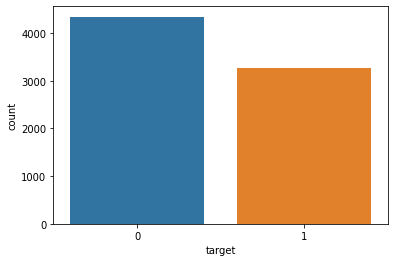

In [14]:
sns.countplot(train['target'])

# DATA PREPROCESSING :-
1.Importing the libraries for Processing the message feature.

2.Using Word_Net_Lemmatizer for converting in words.

3.Lower case the Words.

4.Split the message.

5.Joining the word after Lemmatizing of each word.

In [15]:
import re
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
# ps = PorterStemmer()
wo = WordNetLemmatizer()
corpus_train=[]
for i in range(0,len(train)):
    text = re.sub('[^a-zA-Z]',' ',train['text'][i])
    text = text.lower()
    text = text.split()
    text = [wo.lemmatize(word) for word in text ]
    text = ' '.join(text)
    corpus_train.append(text)

In [16]:
corpus_train[2]

'all resident asked to shelter in place are being notified by officer no other evacuation or shelter in place order are expected'

### Always do same operation as in train or test otherwise it'll give ERROR

In [17]:
import re
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
# ps = PorterStemmer()
wo = WordNetLemmatizer()
corpus_test=[]
for i in range(0,len(test)):
    text = re.sub('[^a-zA-Z]',' ',test['text'][i])
    text = text.lower()
    text = text.split()
    text = [wo.lemmatize(word) for word in text ]
    text = ' '.join(text)
    corpus_test.append(text)

In [18]:
corpus_test[3]

'apocalypse lighting spokane wildfire'

## IMPORTING THE REQUIRED LIBRARIES FOR WORDS INITILIAZATION

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Trapti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
STOPWORDS.add('https')  # remove htps to the world Cloud

def Plot_world(text):
    
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    
    for val in text: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 5000, height = 4000, 
                    background_color ='black', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    # plot the WordCloud image                        
    plt.figure(figsize = (12, 12), facecolor = 'k', edgecolor = 'k' ) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

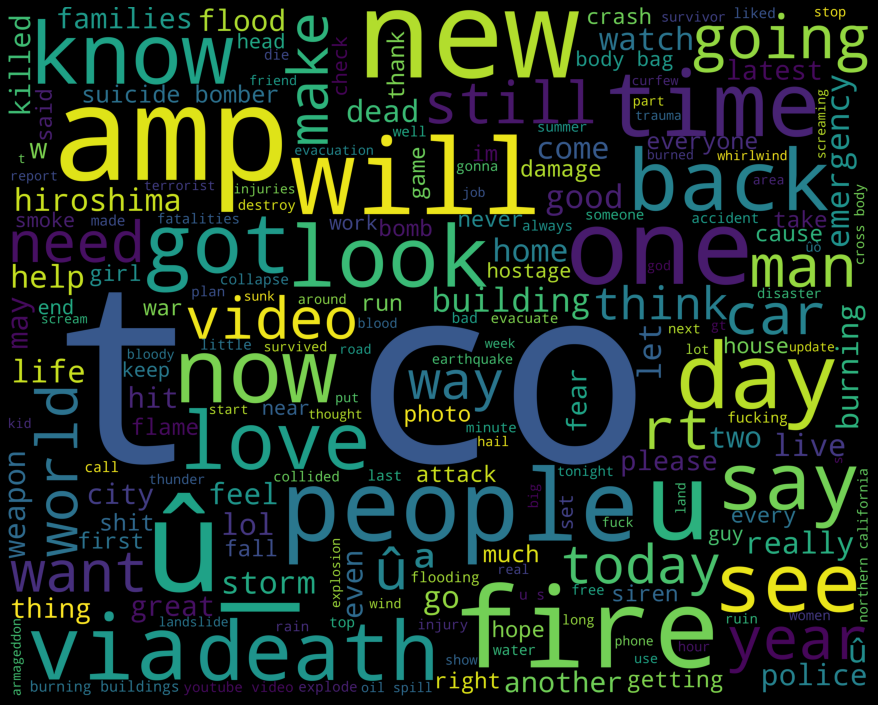

In [21]:
text = train.text.values

Plot_world(text)

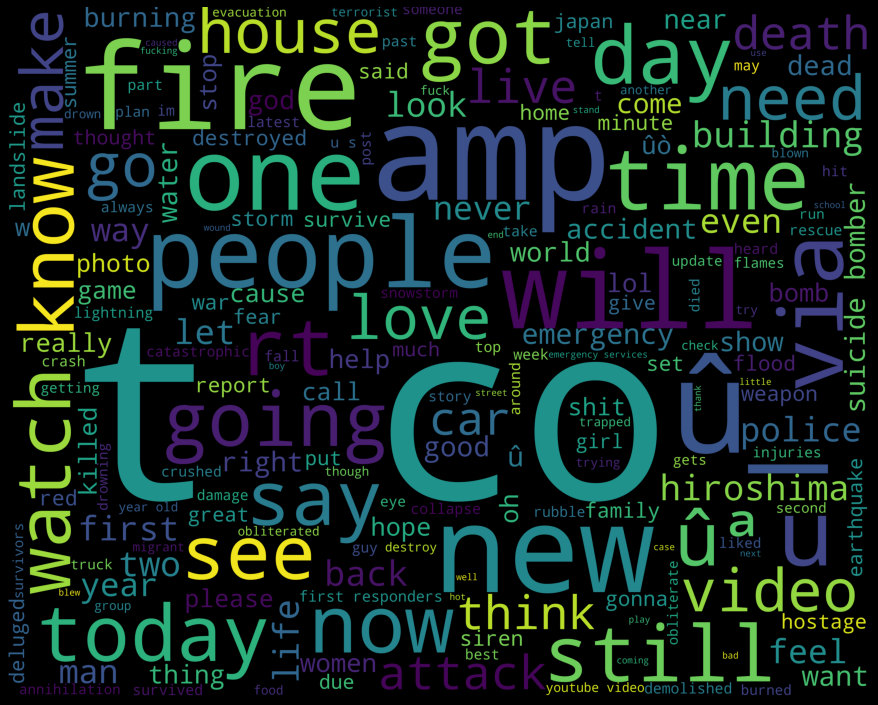

In [22]:
text = test.text.values

Plot_world(text)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus_train,train['target'],test_size=0.25,random_state=42)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( ngram_range=(1,3), stop_words='english',max_features=15000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [25]:
test_vect =  vectorizer.transform(corpus_test)

In [26]:
X_train_vect.shape,test_vect.shape

((5709, 15000), (3263, 15000))

In [27]:
from imblearn.over_sampling import SMOTE
x_resample, y_resample = SMOTE().fit_sample(X_train_vect, y_train)
x_test_resample, y_test_resample = SMOTE().fit_sample(X_test_vect, y_test)
# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(6502, 15000)
(6502,)


In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(x_resample,y_resample)

LogisticRegression()

In [29]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(x_test_resample)
accuracy_score(y_test_resample,y_pred)
print(classification_report(y_test_resample,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1091
           1       0.81      0.77      0.79      1091

    accuracy                           0.80      2182
   macro avg       0.80      0.80      0.80      2182
weighted avg       0.80      0.80      0.80      2182



In [30]:
preds_test =  clf.predict(test_vect)
download_preds(preds_test, file_name='model.csv')

## Do Same In MNB

In [31]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_resample,y_resample)

MultinomialNB()

In [32]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = mnb.predict(x_test_resample)
accuracy_score(y_test_resample,y_pred)
print(classification_report(y_test_resample,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1091
           1       0.83      0.74      0.78      1091

    accuracy                           0.79      2182
   macro avg       0.79      0.79      0.79      2182
weighted avg       0.79      0.79      0.79      2182



In [33]:
preds_test =  mnb.predict(test_vect)
download_preds(preds_test, file_name='model.csv')